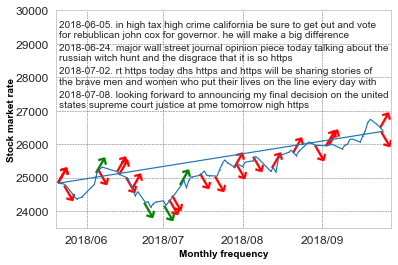

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import markers
from matplotlib import animation, rc
from IPython.display import HTML
from datetime import datetime
import numpy as np
from datetime import timedelta
import matplotlib.dates as md
from pandas.tseries.offsets import BDay
import seaborn as sns
import textwrap

#Formats for the graph
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
sns.set_style("whitegrid")

custom_style = {
            'grid.color': '0.4',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
}
sns.set_style(custom_style)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

xs = []
ys = []
arrow = []
anno = []
xlabel = []
xpoint = []
ypoint = []  
k = [] 

def animate(i):
    
    if i == 0 and len(xlabel) == 0:
        #The first round will be ignored
        xlabel.append("drop")     
        
    else:
        
        data = open('animation.txt','r').read()
        
        if i == 0 and len(xlabel) != 0:
            xlabel.clear()
            prev_xlab=""
            line = data.split('\n')[:1]
            k.append(0)

        else:
            prev_xlab=max(xlabel)       
            line = data.split('\n')[i:i+1]
            if i == 1:
                del k[0]

        if len(line) > 0:
            #print(i)
            #print(line[0].split(',')[:1][0])
            #print()
            
            #Add the printable labels into the list
            dttime = line[0].split(',')[:1][0]
            x=datetime.strptime(dttime[:10], "%Y-%m-%d").date()
            xlab=str(x.timetuple()[1]) + "/" + str(x.timetuple()[0])[2:]

            if xlab != prev_xlab:
                xlabel.append(xlab)
            else:
                xlabel.append("")
            #Add the values to lists for x and y in the plot
            y = float(line[0].split(',')[3:4][0][:5])
            #xs.append(md.date2num(x))
            xs.append(x)
            ys.append(y)
            
            #Add the arrow points to the plot
            #print(line[0].split(',')[1:2][0])
            if line[0].split(',')[2:3][0] == 'BIGNEG' :
                arrow.append(30)
                anno.append(line[0].split(',')[1:2][0])
                xpoint.append(x) #+ timedelta(days=1))                
                ypoint.append(y-250)
                if line[0].split(',')[1:2][0] != "":
                    k.append(max(k)+1)
                else:
                    k.append(0)                    
                
            elif line[0].split(',')[2:3][0] == 'BIGPOS' :
                arrow.append(150)    
                anno.append(line[0].split(',')[1:2][0])
                xpoint.append(x + timedelta(days=2)) 
                ypoint.append(y+200)
                if line[0].split(',')[1:2][0] != "":
                    k.append(max(k)+1)
                else:
                    k.append(0)
                
            else:
                #not showing the arrow
                arrow.append(0)
                anno.append("")
                xpoint.append(x)                
                ypoint.append(y)
                k.append(0)
                 
        ax.clear()
        plt.ylim((23500,30000))
        plt.xlim(xs[0]- timedelta(days=1),xs[0]+timedelta(days=130))
        ax.plot(xs, ys)
        monthsFmt = md.DateFormatter('%Y/%m')
        ax.xaxis.set_major_locator(md.MonthLocator())
        ax.xaxis.set_major_formatter(monthsFmt)
        plt.xlabel('Monthly frequency', fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')
        plt.ylabel('Stock market rate', fontweight='bold', color = 'black', fontsize='10', verticalalignment='center')
    
        #arrows
        for j in range(len(xs)):
            if xs[j] != 0:
                if arrow[j] == 0:
                    ax.scatter(xs[j], ys[j], marker=".", s=1, color='b')
                else:
                    ar=markers.MarkerStyle(marker=u'$\u2193$')
                    ar._transform = ar.get_transform().rotate_deg(arrow[j])
                    #Tweets appearing in annotation
                    if anno[j] != "":
                        ax.scatter(xpoint[j], ypoint[j], marker=ar, s=300, color='g')
                        text=textwrap.fill(str(xs[j]) + ". " + anno[j], width=75)
                        ax.annotate(text, xy=(xs[j], ys[j]), xytext=(min(xs), 29900-k[j]*700), fontsize=10) 
                    else:
                        ax.scatter(xpoint[j], ypoint[j], marker=ar, s=300, color='r') 
                        ax.annotate(anno[j], xy=(xs[j], ys[j]), xytext=(min(xs), 0))    

                
ani = animation.FuncAnimation(fig, animate, interval=500)
#HTML(ani.to_html5_video())

rc('animation', html='html5')

ani
